# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
#print cities and see names 
cities


['castro',
 'isangel',
 'punta arenas',
 'port alfred',
 'hobart',
 'hermanus',
 'dingle',
 'namibe',
 'northam',
 'tabas',
 'burica',
 'alice springs',
 'tuatapere',
 'ahipara',
 'tuktoyaktuk',
 'praia',
 'mount isa',
 'kapaa',
 'rikitea',
 'matagami',
 'comodoro rivadavia',
 'mount gambier',
 'acajutla',
 'ushuaia',
 'vaini',
 'saint-philippe',
 'ribeira grande',
 'talara',
 'rungata',
 'hanmer springs',
 'mar del plata',
 'tazovskiy',
 'bluff',
 'seymchan',
 'dera bugti',
 'gushikawa',
 'inirida',
 'lorengau',
 'nizhniy kuranakh',
 'puerto ayora',
 'hualmay',
 'vanavara',
 'donskoy',
 'mahebourg',
 'lompoc',
 'carnarvon',
 'umzimvubu',
 'provideniya',
 'ridgecrest',
 'upernavik',
 'barrow',
 'sitka',
 'leningradskiy',
 'taoudenni',
 'mys shmidta',
 'moindou',
 'hilo',
 'havoysund',
 'arraial do cabo',
 'maceio',
 'avarua',
 'fallon',
 'east london',
 'tiksi',
 'ramos arizpe',
 'carutapera',
 'port elizabeth',
 'luderitz',
 'srednekolymsk',
 'jamestown',
 'samusu',
 'shihezi',
 'arba

In [5]:
#demo api 

# demo api call for one city

# steps to make an api call
# 1. URL: assemble the order (restaurant location, type of order)
# 2. REQUEST: send the order

#               restaurant name                         order configuration  (  password   type of search  )
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + 'kawalu'
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7bc44a4580ee3a51e0b787610a87e7&q=kawalu'

In [6]:
# send the order, and handle the output
kawalu_weather_output = requests.get(url).json()

kawalu_weather_output

{'coord': {'lon': 108.21, 'lat': -7.38},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 63.82,
  'pressure': 1013.92,
  'humidity': 96,
  'temp_min': 63.82,
  'temp_max': 63.82,
  'sea_level': 1013.92,
  'grnd_level': 946.52},
 'wind': {'speed': 3.98, 'deg': 37.971},
 'clouds': {'all': 23},
 'dt': 1563033514,
 'sys': {'message': 0.0076,
  'country': 'ID',
  'sunrise': 1562972457,
  'sunset': 1563014657},
 'timezone': 25200,
 'id': 1640902,
 'name': 'Kawalu',
 'cod': 200}

In [7]:
#retrieve the data you want from all cities first using one city to see if it worked 

city_dictionary = {
    'name': kawalu_weather_output['name'],
    'temperature': kawalu_weather_output['main']['temp'],
    'humidity': kawalu_weather_output['main']['humidity'],
    'cloudiness': kawalu_weather_output['clouds']['all'],
    'wind speed': kawalu_weather_output['wind']['speed'],
    'lat': kawalu_weather_output['coord']['lat'],
    'lon': kawalu_weather_output['coord']['lon']
}

city_dictionary

{'name': 'Kawalu',
 'temperature': 63.82,
 'humidity': 96,
 'cloudiness': 23,
 'wind speed': 3.98,
 'lat': -7.38,
 'lon': 108.21}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# For loop and make a bunch of different city dictionaries

# create an empty list that we can add each city dictionary to
city_dictionaries1 = []


counter = 1
# for loop
for city in cities: # going through the list of cities and performing an api call for each city
    print(counter)
    counter += 1
    
    # attempt to do something, otherwise if there is a problem go to the `except` area
    try:
        # make the order for each different city
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city

        # send the order, and handle the output
        city_weather_output = requests.get(url).json()

        # check to see if the data is good
        # create our custom dictionary (will represent a row in a dataframe)
        city_dictionary = {
            'name': city_weather_output['name'],
            'temperature': city_weather_output['main']['temp'],
            'humidity': city_weather_output['main']['humidity'],
            'cloudiness': city_weather_output['clouds']['all'],
            'wind speed': city_weather_output['wind']['speed'],
            'lat': city_weather_output['coord']['lat'],
            'lon': city_weather_output['coord']['lon']
        }

        # add to city_dictionaries list
        city_dictionaries1.append(city_dictionary)
        
    except:
        print(f'Something goofed with the api call with city: {city}')
    

1
2
3
4
5
6
7
8
9
10
11
Something goofed with the api call with city: burica
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Something goofed with the api call with city: rungata
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
Something goofed with the api call with city: umzimvubu
48
49
50
51
52
53
54
55
Something goofed with the api call with city: mys shmidta
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
Something goofed with the api call with city: samusu
72
73
74
75
76
77
78
79
80
81
82
Something goofed with the api call with city: tsihombe
83
84
85
Something goofed with the api call with city: taolanaro
86
87
88
Something goofed with the api call with city: odweyne
89
90
91
92
93
Something goofed with the api call with city: solovetskiy
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
Something goofed with the api call with city: korla
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
Something goofed with the api c

In [9]:
city_dictionaries1 #gives us cities with all the information needed for our dataframes


[{'name': 'Castro',
  'temperature': 48.2,
  'humidity': 93,
  'cloudiness': 40,
  'wind speed': 13.87,
  'lat': -42.48,
  'lon': -73.76},
 {'name': 'Isangel',
  'temperature': 71.6,
  'humidity': 73,
  'cloudiness': 20,
  'wind speed': 11.41,
  'lat': -19.55,
  'lon': 169.27},
 {'name': 'Punta Arenas',
  'temperature': 41,
  'humidity': 93,
  'cloudiness': 75,
  'wind speed': 11.41,
  'lat': -53.16,
  'lon': -70.91},
 {'name': 'Port Alfred',
  'temperature': 60.01,
  'humidity': 90,
  'cloudiness': 0,
  'wind speed': 1.99,
  'lat': -33.59,
  'lon': 26.89},
 {'name': 'Hobart',
  'temperature': 41.97,
  'humidity': 95,
  'cloudiness': 40,
  'wind speed': 9.17,
  'lat': -42.88,
  'lon': 147.33},
 {'name': 'Hermanus',
  'temperature': 61,
  'humidity': 83,
  'cloudiness': 0,
  'wind speed': 1.99,
  'lat': -34.42,
  'lon': 19.24},
 {'name': 'Dingle',
  'temperature': 74.44,
  'humidity': 89,
  'cloudiness': 100,
  'wind speed': 3.38,
  'lat': 11,
  'lon': 122.67},
 {'name': 'Namibe',
  'te

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# city_dictionaries=city_dictionaries()
# city_dictionaries.to_csv("../Resporces/weatherpy_data.csv")
# city_dictionaries.count(axis = 0)
city_dictionaries=pd.DataFrame()



city_dictionaries = pd.DataFrame(city_dictionaries1)
# # city_dictionaries.to_csv('results.csv', index=False, header=False)


city_dictionaries.to_csv("weatherpy_data.csv")
city_dictionaries.count(axis = 0)
city_dictionaries.info()

# pd.dataframe thead th {
#     text-align: left;
# }

# pd.dataframe tbody tr th {
#     vertical-align: top;
# }
city_dictionaries=city_dictionaries[['name','temperature','wind speed','cloudiness','humidity','lat','lon']]
# city_dictionaries['name']
city_dictionaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
cloudiness     547 non-null int64
humidity       547 non-null int64
lat            547 non-null float64
lon            547 non-null float64
name           547 non-null object
temperature    547 non-null float64
wind speed     547 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 30.0+ KB


,name,temperature,wind speed,cloudiness,humidity,lat,lon
0,Castro,48.20,13.87,40,93,-42.48,-73.76
1,Isangel,71.60,11.41,20,73,-19.55,169.27
2,Punta Arenas,41.00,11.41,75,93,-53.16,-70.91
3,Port Alfred,60.01,1.99,0,90,-33.59,26.89
4,Hobart,41.97,9.17,40,95,-42.88,147.33
5,Hermanus,61.00,1.99,0,83,-34.42,19.24
6,Dingle,74.44,3.38,100,89,11.00,122.67
7,Namibe,66.52,8.30,89,84,-15.19,12.15
8,Northam,53.60,6.93,0,66,-31.65,116.67
9,Tabas,111.20,6.93,0,8,33.60,56.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

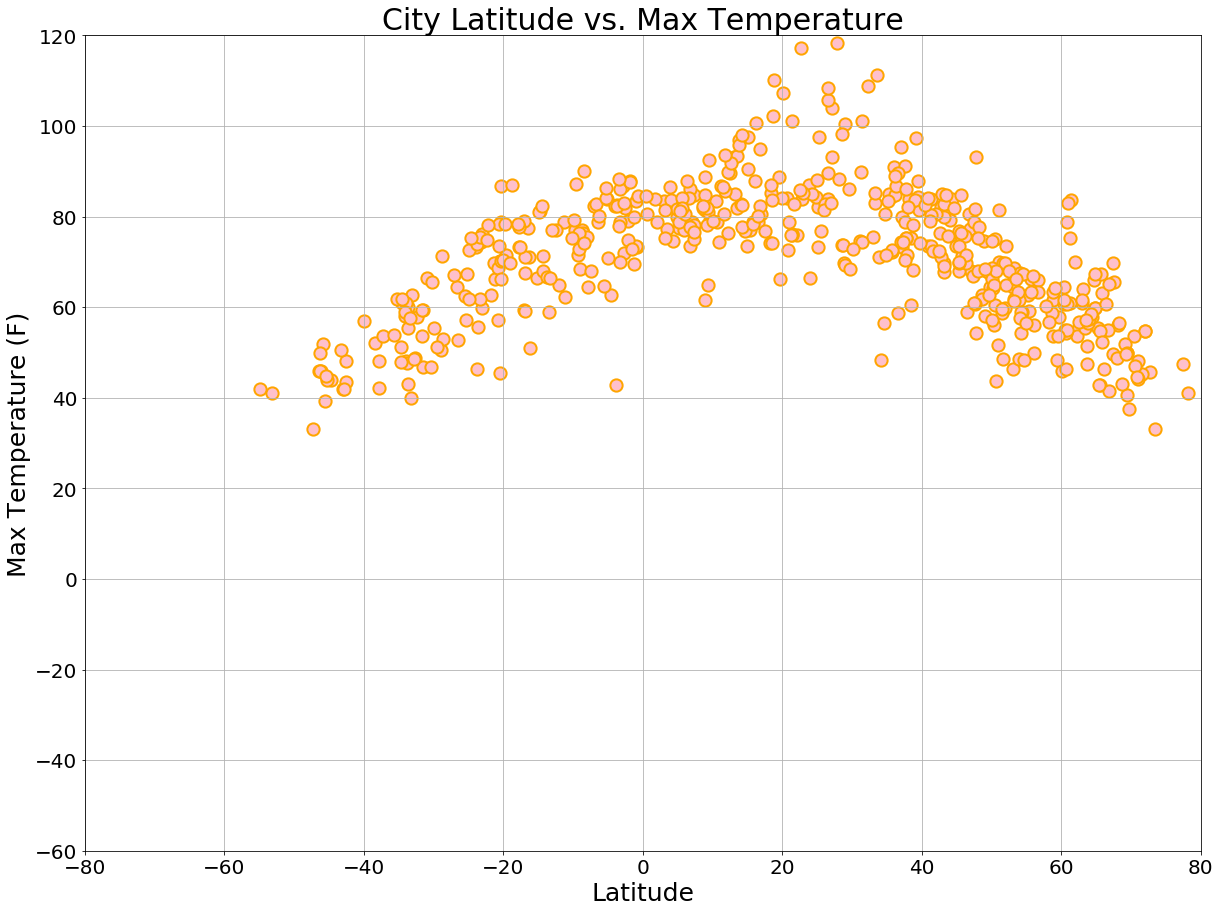

<Figure size 432x288 with 0 Axes>

In [47]:
city_dictionaries.plot(kind="scatter", x="lat", y="temperature",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Max Temperature', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

#### Latitude vs. Humidity Plot

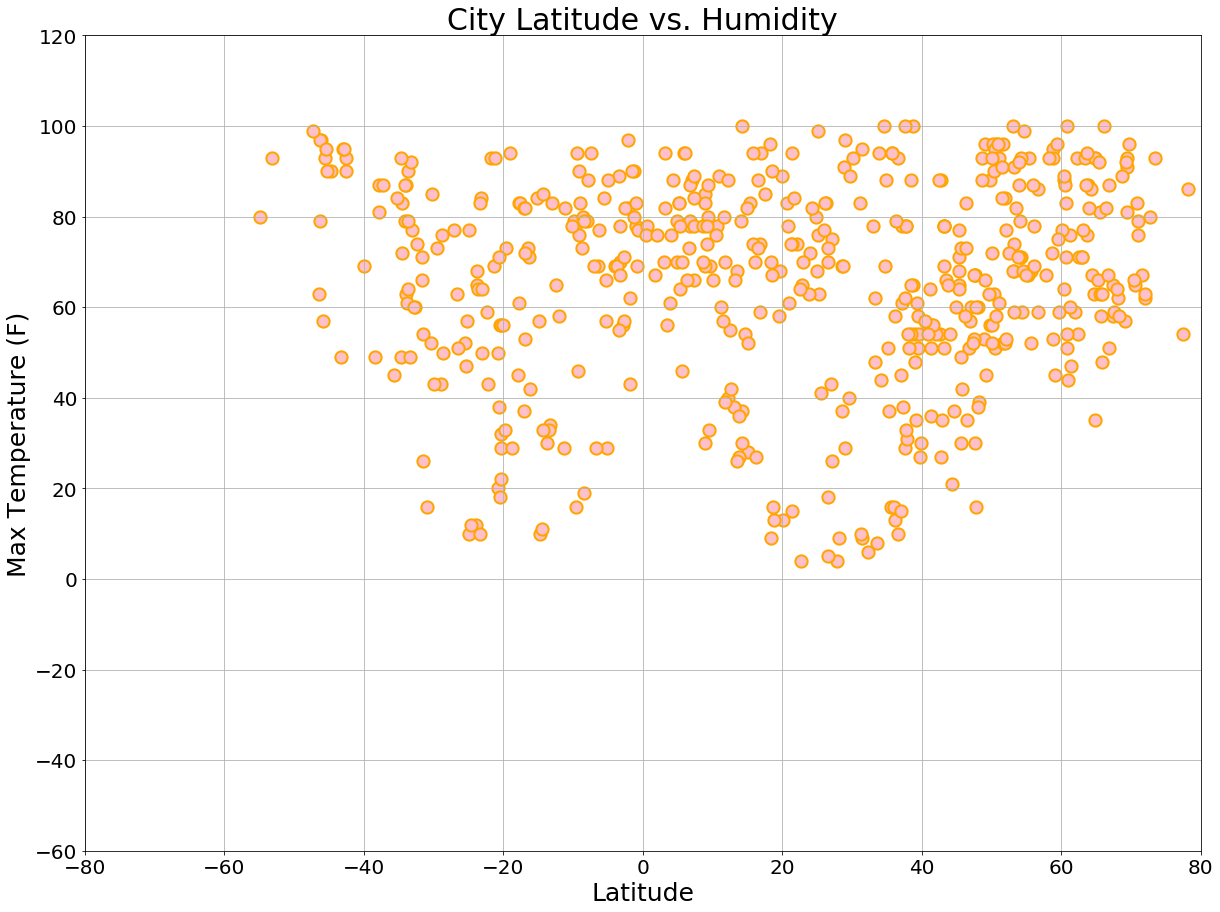

<Figure size 432x288 with 0 Axes>

In [49]:
city_dictionaries.plot(kind="scatter", x="lat", y="humidity",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

#### Latitude vs. Cloudiness Plot

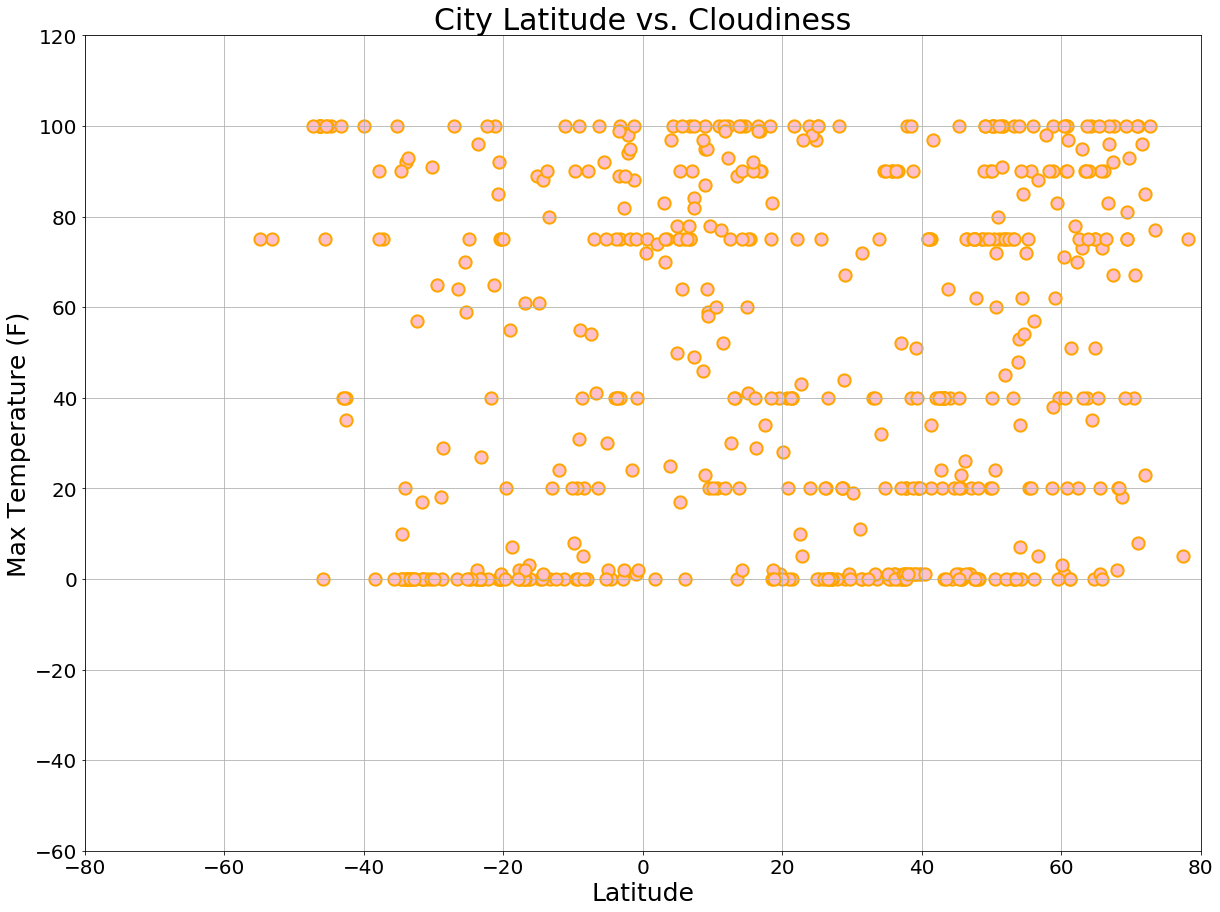

<Figure size 432x288 with 0 Axes>

In [51]:
city_dictionaries.plot(kind="scatter", x="lat", y="cloudiness",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

#### Latitude vs. Wind Speed Plot

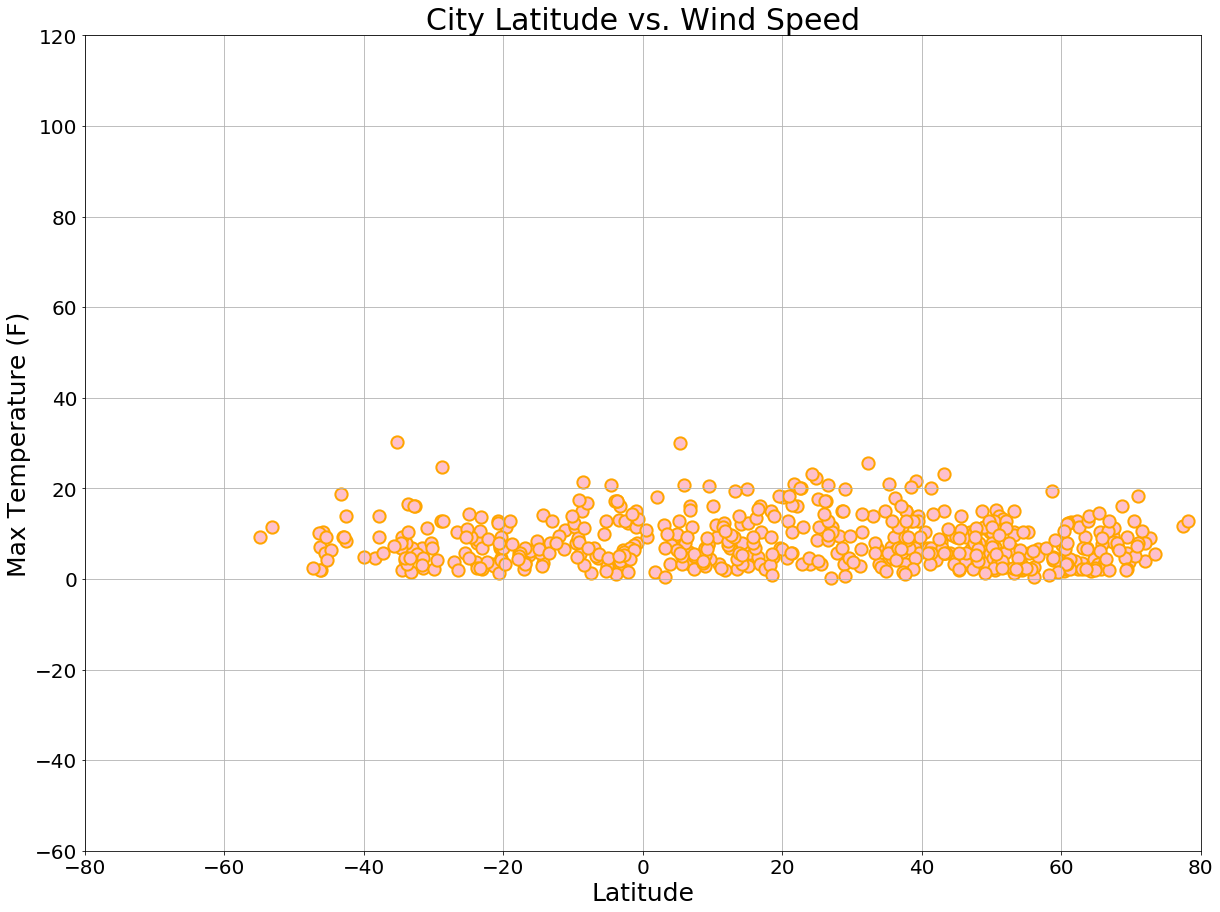

<Figure size 432x288 with 0 Axes>

In [52]:
city_dictionaries.plot(kind="scatter", x="lat", y="wind speed",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

# CONCLUSION 


In [ ]:
1. Cities located closest to the equater are warmer in temperature
2.Cloudiness and humidity are sportatic and have correlation with latitude and longitiude (could include outside factors ex. pollution)
3. Wind speed remains constant 
